<a href="https://colab.research.google.com/github/TheAnthem1/first/blob/main/tumor_detection_soft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook

import warnings 
warnings.filterwarnings('ignore')

     |████████████████████████████████| 720 kB 5.2 MB/s 
     |████████████████████████████████| 188 kB 47.3 MB/s 
     |████████████████████████████████| 1.2 MB 46.9 MB/s 
     |████████████████████████████████| 60 kB 7.1 MB/s 


In [2]:
from fastbook import *

In [3]:
path = Path('/content/dataset') 

In [4]:
Object_types = 'no','yes'

In [5]:
Object_types = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [6]:
dls = Object_types.dataloaders(path)

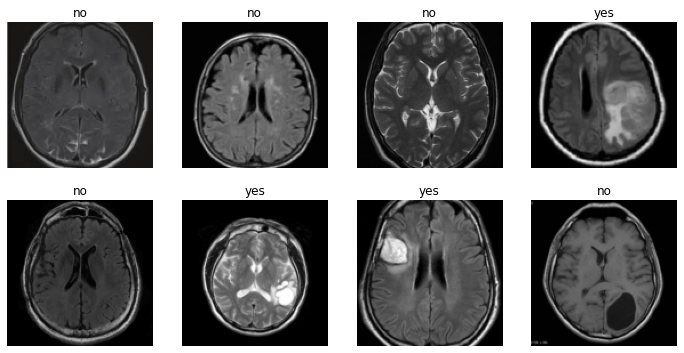

In [7]:
dls.valid.show_batch(max_n=8, nrows=2)

In [ ]:
## Squish Method used to resize

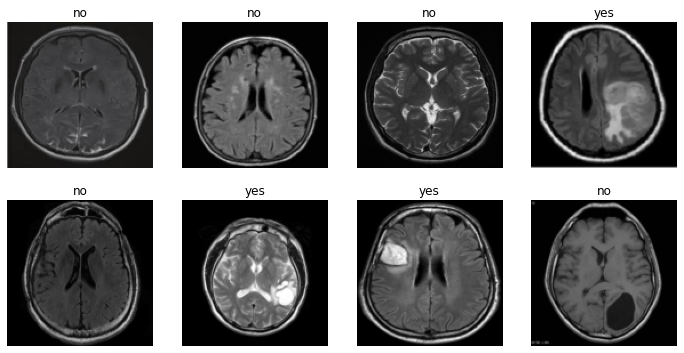

In [8]:
Object_types = Object_types.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = Object_types.dataloaders(path)
dls.valid.show_batch(max_n=8, nrows=2)

In [9]:
## Resize and Crop using coding

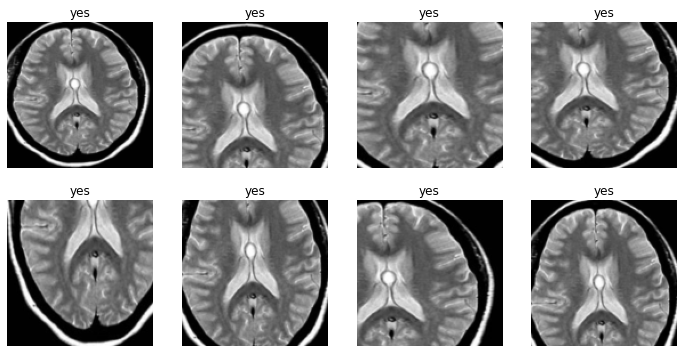

In [10]:
Object_types = Object_types.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = Object_types.dataloaders(path,bs=64)
dls.train.show_batch(max_n=8, nrows=2, unique=True)


In [13]:
## Using accuracy matrix
## resnet18

In [16]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(8)

epoch,train_loss,valid_loss,accuracy,time
0,1.076164,0.940471,0.660000,00:14


epoch,train_loss,valid_loss,accuracy,time
0,0.916995,0.778532,0.660000,00:19
1,0.948357,0.435310,0.780000,00:19
2,0.849890,0.329698,0.860000,00:19
3,0.772874,0.248279,0.900000,00:19
4,0.698879,0.175434,0.940000,00:19
5,0.640421,0.161131,0.940000,00:22
6,0.582532,0.180063,0.940000,00:19
7,0.539357,0.187448,0.920000,00:19


In [ ]:
## Confusion Matrix

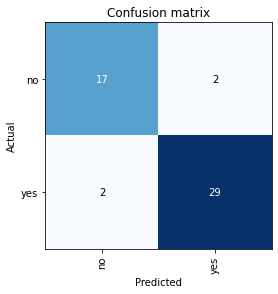

In [17]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [18]:
## resnet34

In [19]:
learn1 = cnn_learner(dls, resnet34, metrics=accuracy)
learn1.fine_tune(8)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,accuracy,time
0,1.440500,0.513136,0.760000,00:25


epoch,train_loss,valid_loss,accuracy,time
0,0.905254,0.443990,0.820000,00:34
1,0.862889,0.283022,0.900000,00:35
2,0.801346,0.247102,0.940000,00:35
3,0.722766,0.285227,0.940000,00:34
4,0.627144,0.290929,0.920000,00:34
5,0.567120,0.328002,0.900000,00:34
6,0.528139,0.320277,0.900000,00:34
7,0.499611,0.323388,0.880000,00:34


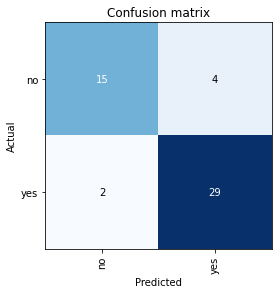

In [20]:
interp = ClassificationInterpretation.from_learner(learn1)
interp.plot_confusion_matrix()

In [21]:
## Data

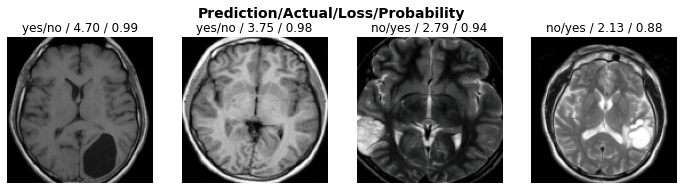

In [22]:
interp.plot_top_losses(4, nrows=1)

In [23]:
from fastai.vision.widgets import *

In [24]:
## SAVING MODEL

In [25]:
learn.export()

In [26]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [27]:
learn_inf = load_learner(path/'export.pkl')

In [28]:
## Checking

In [29]:
learn_inf.predict('/content/dataset/no/12 no.jpg')

('no', TensorBase(0), TensorBase([0.9932, 0.0068]))

In [30]:
learn_inf.dls.vocab

['no', 'yes']

In [31]:
## Simple Application

In [32]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [33]:
btn_upload = SimpleNamespace(data = ['/content/dataset/no/12 no.jpg'])

In [34]:
img = PILImage.create(btn_upload.data[-1])

In [35]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [36]:
pred,pred_idx,probs = learn_inf.predict(img)

In [37]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: no; Probability: 0.9932')

In [38]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [39]:
def on_click_classify(change):
 img = PILImage.create(btn_upload.data[-1])
 out_pl.clear_output()
 with out_pl: display(img.to_thumb(128,128))
 pred,pred_idx,probs = learn_inf.predict(img)
 lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)

In [40]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [42]:
VBox([widgets.Label('Select your image'),
      btn_upload, btn_run, out_pl, lbl_pred])